## Часть первая. Исследование одномерной выборки.
### Вариационный ряд

In [116]:
import math
import pandas as pd
source = pd.read_csv('sample_100.csv', sep=';')
data = source['Gun_ownership']
d_max, d_min = data.max(), data.min()
k = 1 + 3.22 * math.log10(len(data))
k = 6
N = len(data)
h = math.ceil((d_max - d_min) / k)
print(f'Xmin = {d_min}; Xmax = {d_max}')
print(f'K = {k}; H = {h}')
print(f'N = {N}')
data

Xmin = 14700; Xmax = 66300
K = 6; H = 8600
N = 94


0     46300
1     48800
2     45700
3     40200
4     44800
      ...  
89    27800
90    44800
91    60100
92    27800
93    28300
Name: Gun_ownership, Length: 94, dtype: int64

In [117]:
series = {}
interval_starts = []
interval_ends = []
for i in range(math.ceil(k)):
    c_min = d_min + h * i
    c_max = c_min + h
    interval_starts.append(c_min)
    interval_ends.append(c_max)
    series[f'({c_min}; {c_max}]'] = data[(data > c_min) & (data <= c_max)].tolist()
series[f'({d_min}; {d_min + h}]'] = data[(data >= d_min) & (data <= d_min + h)].tolist()
series_n = pd.DataFrame({key: len(series[key]) for key in series}, index=['Count']).T
series_n['Centers'] = [(x[0] + x[1]) / 2 for x in zip(interval_starts, interval_ends)]
series_n['Relative'] = series_n['Count'] / N
print('Вариационный ряд:')
series_n[['Count']].T

Вариационный ряд:


,(14700; 23300],(23300; 31900],(31900; 40500],(40500; 49100],(49100; 57700],(57700; 66300]
Count,5,17,12,40,18,2


### Полигон и гистограмма частот

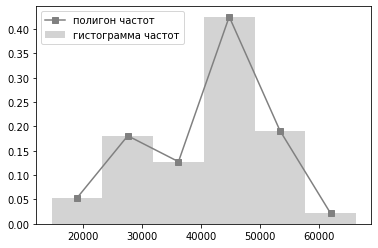

In [118]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(series_n['Centers'], series_n['Relative'], marker='s', label='полигон частот', color='gray')
plt.bar(np.array(interval_starts) + h / 2, series_n['Relative'], h, label='гистограмма частот', color='lightgray')
plt.legend()

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.show()

In [119]:
series_n.T

,(14700; 23300],(23300; 31900],(31900; 40500],(40500; 49100],(49100; 57700],(57700; 66300]
Count,5.000000,17.000000,12.00000,40.000000,18.000000,2.000000
Centers,19000.000000,27600.000000,36200.00000,44800.000000,53400.000000,62000.000000
Relative,0.053191,0.180851,0.12766,0.425532,0.191489,0.021277


### Эмпирическая функция распределения

In [120]:
cumulative = [0.0]
for v in series_n['Relative']:
    cumulative.append(cumulative[-1] + v)
cumulative.append(1.0)
[round(x, 3) for x in cumulative]

[0.0, 0.053, 0.234, 0.362, 0.787, 0.979, 1.0, 1.0]

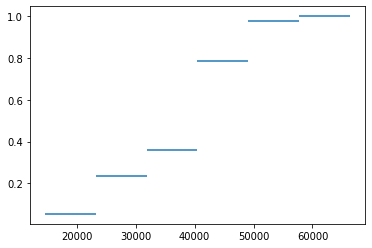

In [121]:
plt.hlines(cumulative[1:-1], interval_starts, interval_ends)

### Выборочная средняя

In [122]:
# несмещённая оценка генеральной средней
mean = (series_n['Count'] * series_n['Centers']).sum() / N
mean

41231.914893617024

### Выборочная дисперсия

In [123]:
disp = (series_n['Count'] * (series_n['Centers'] - mean) ** 2).sum() / N
disp

106076853.77999094

### Исправленная дисперсия

In [124]:
s_2 = N * disp / (N - 1)
s_2

107217465.11095859

### Среднее квадратическое

In [125]:
sigma = math.sqrt(disp)
s = math.sqrt(s_2)
s, sigma

(10354.586670213283, 10299.361814209215)

### Ассиметрия

In [126]:
assim = (series_n['Count'] * (series_n['Centers'] - mean) ** 3).sum() / (N * s ** 3)
assim

-0.4539500001795486

### Эксцесс

In [127]:
ex = (series_n['Count'] * (series_n['Centers'] - mean) ** 4).sum() / (N * s ** 4) - 3
ex

-0.6037517015555047

### Доверительные интервалы

In [128]:
ty = 1.96
delta = ty * s / math.sqrt(N)
print(delta)
print(f'{mean - delta} < a < {mean + delta}')

2093.2683748256704
39138.646518791356 < a < 43325.18326844269


### Уровень значимости

In [129]:
import scipy.stats
def laplace(x):
    return scipy.stats.norm.cdf(x) - 0.5

In [130]:
t1 = (np.array(interval_starts) - mean) / s
t2 = (np.array(interval_ends) - mean) / s
t3 = laplace(t1)
t4 = laplace(t2)
t5 = t4 - t3
t6 = N * t5
t7 = (series_n['Count'].values - t6) ** 2 / t6
table2 = pd.DataFrame([interval_starts, interval_ends, series_n['Count'], t1, t2, t3, t4, t5, t6, t7]).T
table2

,0,1,2,3,4,5,6,7,8,9
0,14700.0,23300.0,5.0,-2.562335,-1.731785,-0.494801,-0.458344,0.036457,3.426995,0.722016
1,23300.0,31900.0,17.0,-1.731785,-0.901235,-0.458344,-0.316268,0.142076,13.355122,0.994759
2,31900.0,40500.0,12.0,-0.901235,-0.070685,-0.316268,-0.028176,0.288092,27.080693,8.398134
3,40500.0,49100.0,40.0,-0.070685,0.759865,-0.028176,0.276332,0.304508,28.623760,4.521378
4,49100.0,57700.0,18.0,0.759865,1.590415,0.276332,0.444129,0.167797,15.772921,0.314456
5,57700.0,66300.0,2.0,1.590415,2.420964,0.444129,0.492260,0.048131,4.524314,1.408426


In [131]:
r = k - 2 - 1
x_2 = t7.sum()
r, scipy.stats.chi2.sf(x_2, r), x_2

(3, 0.0009570345823684637, 16.359169262716566)

In [132]:
print('\n'.join(map(str, interval_ends)))

23300
31900
40500
49100
57700
66300


### Корреляционная таблица

In [136]:
# copied from previous notebook, TODO: a better solution
x_interval_starts, x_interval_ends = [0, 106, 212, 318, 424, 530], [106, 212, 318, 424, 530, 636]
x_centers = [53.0, 159.0, 265.0, 371.0, 477.0, 583.0]
corr_table = pd.DataFrame(np.arange(k ** 2).reshape(k, -1),
    index=[f'({x[0]};{x[1]}]' for x in zip(x_interval_starts, x_interval_ends)],
    columns=[f'({x[0]};{x[1]}]' for x in zip(interval_starts, interval_ends)])
corr_table[:] = 0
for i in range(k):
    for j in range(k):
        condition = (source['Crime_rate'] <= x_interval_ends[i]) & (source['Gun_ownership'] <= interval_ends[j])
        condition &= source['Crime_rate'] > x_interval_starts[i] if i != 0 else source['Crime_rate'] >= x_interval_starts[i]
        condition &= source['Gun_ownership'] > interval_starts[j] if j != 0 else source['Gun_ownership'] >= interval_starts[j]
        corr_table.iloc[i, j] += condition.sum()
corr_table.to_clipboard(sep=',')
corr_table

,(14700;23300],(23300;31900],(31900;40500],(40500;49100],(49100;57700],(57700;66300]
(0;106],0,5,4,16,6,0
(106;212],1,2,4,13,5,0
(212;318],0,4,2,6,2,0
(318;424],2,2,0,3,1,2
(424;530],0,4,0,2,2,0
(530;636],2,0,2,0,2,0


In [142]:
prod_table = pd.DataFrame(np.arange(k ** 2).reshape(k, -1),
    index=x_centers, columns=series_n['Centers'])
prod_table[:] = 0
for i in range(k):
    for j in range(k):
        prod_table.iloc[i, j] = x_centers[i] * series_n['Centers'].values[i] * corr_table.iloc[i, j]
prod_table.to_clipboard(sep=',')
prod_table

Centers,19000.0,27600.0,36200.0,44800.0,53400.0,62000.0
53.0,0,5035000,4028000,16112000,6042000,0
159.0,4388400,8776800,17553600,57049200,21942000,0
265.0,0,38372000,19186000,57558000,19186000,0
371.0,33241600,33241600,0,49862400,16620800,33241600
477.0,0,101887200,0,50943600,50943600,0
583.0,72292000,0,72292000,0,72292000,0


In [146]:
bar_XY = prod_table.values.sum() / N
bar_XY

9171142.553191489

In [150]:
x_mean = 216.51063829787233
k_XY = bar_XY - x_mean * mean
k_XY

243994.34133091755

In [151]:
r_xy = k_XY / math.sqrt(26934.1 * 106076853.77)
r_xy

0.14435047097961196